# Vortex Lattices

The ground state wavefunction of a BEC in a rotating harmonic trap contains a regular Abrikosov lattice of nodes corresponding to single quantum vortices. 

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

import numpy as np
from condensate import Wavefunction, Environment

## Few vortices

In [2]:
steps = 2000
omega = 4
Omega = 0.5*omega*np.ones(steps)

e = Environment(DIM=512, fov=0.56e-3, N=5e5)
e.harmonic_potential(omega=omega)
e.rotating_frame(omegaR=Omega)


            Running condensate on 512x512 grid with:
            atom number: 5e+05 
            mass:        3.80e-26
        


In [3]:
wf = Wavefunction(e)
wf.initialize_Psi(width=100, vortexnumber=5)

In [4]:
wf.relax(dt=2e-3, steps=steps, vmax=3e7)

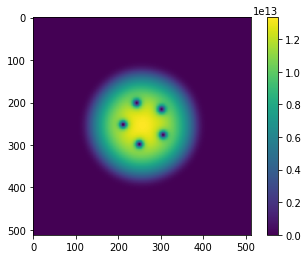

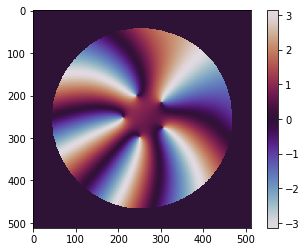

In [5]:
wf.show_density()
wf.show_phase()

## Many vortices

In [6]:
steps = 20000
omega = 4
Omega = 0.85*omega*np.ones(steps)

e = Environment(DIM=512, fov=0.76e-3, N=1.5e6)
e.harmonic_potential(omega=omega)
e.rotating_frame(omegaR=Omega)
e.spoon['type']='mouse'


            Running condensate on 512x512 grid with:
            atom number: 2e+06 
            mass:        3.80e-26
        


In [7]:
wf = Wavefunction(e)
wf.initialize_Psi(width=100, vortexnumber=10)

In [8]:
wf.relax(dt=2e-3, steps=steps, vmax=1e7)

Note that setting steps=0 lets the wavefunction evolve indefinitely. Press ESC in the condensate window to return to python

In [9]:
wf.evolve(dt=1e-4, steps=0, vmax=1e7, cooling=0.1)

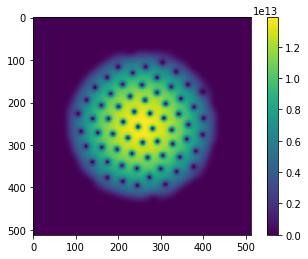

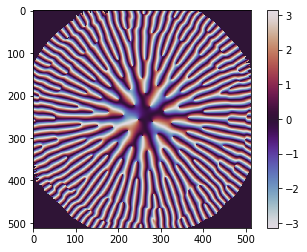

In [10]:
wf.show_density()
wf.show_phase()